In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

Packages for Mathematical Computation and visualization imported!


In [2]:
team = "Newcastle United"
s1 = "2017-18"
s2 = "2018-19"

In [3]:
df1 = pd.read_csv("datasets/cleanedbasic/newcastle17-18.csv")
df2 = pd.read_csv("datasets/cleanedbasic/newcastle18-19.csv")

In [4]:
df2.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
21,Yoshinori Mut?,jp JPN,FWMF,26.0,17,5,524,5.8,1,0,...,0.17,0.9,0.9,0.8,1.7,0.16,0.14,0.30,0.16,0.30
22,Jacob Murphy,eng ENG,MFDF,23.0,9,3,302,3.4,0,1,...,0.30,0.1,0.1,0.6,0.7,0.02,0.18,0.20,0.02,0.20
23,Antonio Barreca,it ITA,DF,23.0,1,0,5,0.1,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
24,Squad Total,NaN,NaN,26.9,38,418,3420,38.0,41,33,...,1.92,39.1,36.7,27.4,64.1,1.03,0.72,1.75,0.97,1.69
25,Opponent Total,NaN,NaN,26.8,38,418,3420,38.0,47,32,...,1.92,53.6,49.2,39.5,88.7,1.41,1.04,2.45,1.29,2.33


In [5]:
df1.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
24,Henri Saivet,sn SEN,MF,26.0,1,1,83,0.9,1,0,...,1.08,0.1,0.1,0.0,0.1,0.05,0.00,0.05,0.05,0.05
25,Aleksandar Mitrovi?,rs SRB,FW,22.0,6,0,95,1.1,1,0,...,0.95,1.2,1.2,0.2,1.3,1.14,0.15,1.29,1.14,1.29
26,Massadio Haïdara,ml MLI,FW,24.0,1,0,4,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
27,Squad Total,NaN,NaN,25.6,38,418,3420,38.0,38,29,...,1.76,41.6,40.9,32.1,72.9,1.10,0.84,1.94,1.08,1.92
28,Opponent Total,NaN,NaN,26.9,38,418,3420,38.0,44,32,...,1.89,52.4,47.6,37.4,85.1,1.38,0.99,2.37,1.25,2.24


In [6]:
df1.shape

(29, 29)

In [7]:
df2.shape

(26, 29)

In [8]:
df1 = df1[df1['Min'] > 0]
df2 = df2[df2['Min'] > 0]

In [9]:
dftotals1 = df1.copy()
dftotals2 = df2.copy()

df1 = df1.iloc[:-2]
df2 = df2.iloc[:-2]

In [10]:
df1.dtypes

Player            object
Nation            object
Pos               object
Age              float64
MP                 int64
Starts             int64
Min                int64
90s              float64
Gls                int64
Ast                int64
G-PK               int64
PK                 int64
PKatt              int64
CrdY             float64
CrdR             float64
Per90Gls         float64
Per90Ast         float64
Per90G+A         float64
Per90G-PK        float64
Per90G+A-PK      float64
xG               float64
npxG             float64
xA               float64
npxG+xAG         float64
Per90xG          float64
Per90xA          float64
Per90xG+xA       float64
Per90npxG        float64
Per90npxG+xAG    float64
dtype: object

### Newcastle United First Season VS Second Season Comparison

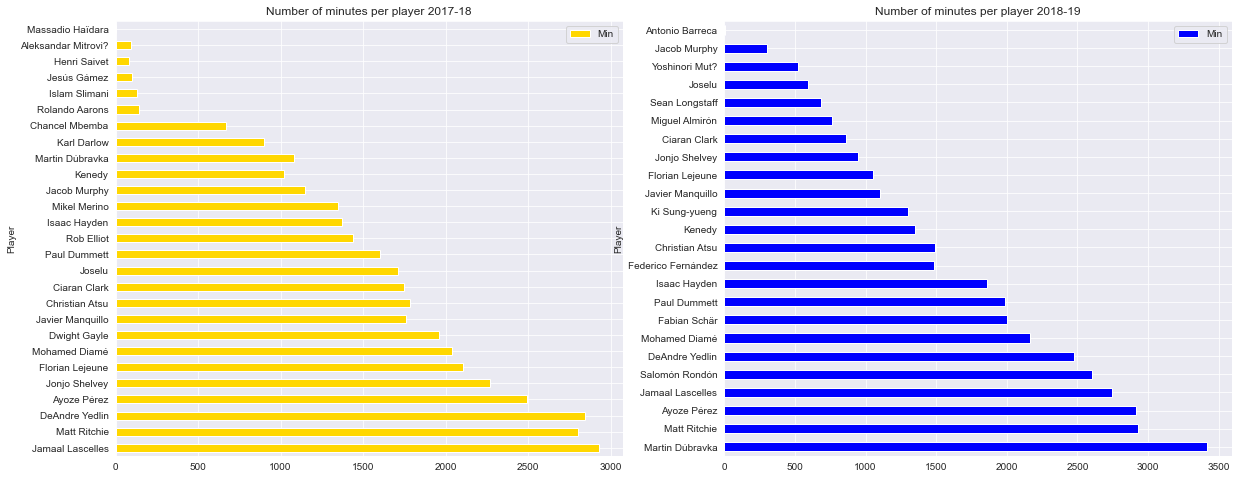

In [11]:
# first let's investigate squad turnover
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
df1.plot.barh(x = 'Player', y = 'Min', ax = ax1, title = 'Number of minutes per player ' + s1,
             color = 'gold')
df2.plot.barh(x = 'Player', y = 'Min', ax = ax2, title = 'Number of minutes per player ' + s2,
             color = 'blue')
plt.show()

In [12]:
print("The number of players in " + team + " first season squad was: " + str(len(df1.index)))
print("The number of players in " + team + " second season squad was: " + str(len(df2.index)))

The number of players in Newcastle United first season squad was: 27
The number of players in Newcastle United second season squad was: 24


In [13]:
print("Mean minutes played in " + team + " first season squad was: " + str(df1['Min'].mean()))
print("Mean minutes played in " + team + " second season squad was: " + str(df2['Min'].mean()))

Mean minutes played in Newcastle United first season squad was: 1391.7777777777778
Mean minutes played in Newcastle United second season squad was: 1565.0416666666667


##### Let's look at performance metrics now. Firstly, we will focus on expected goals.

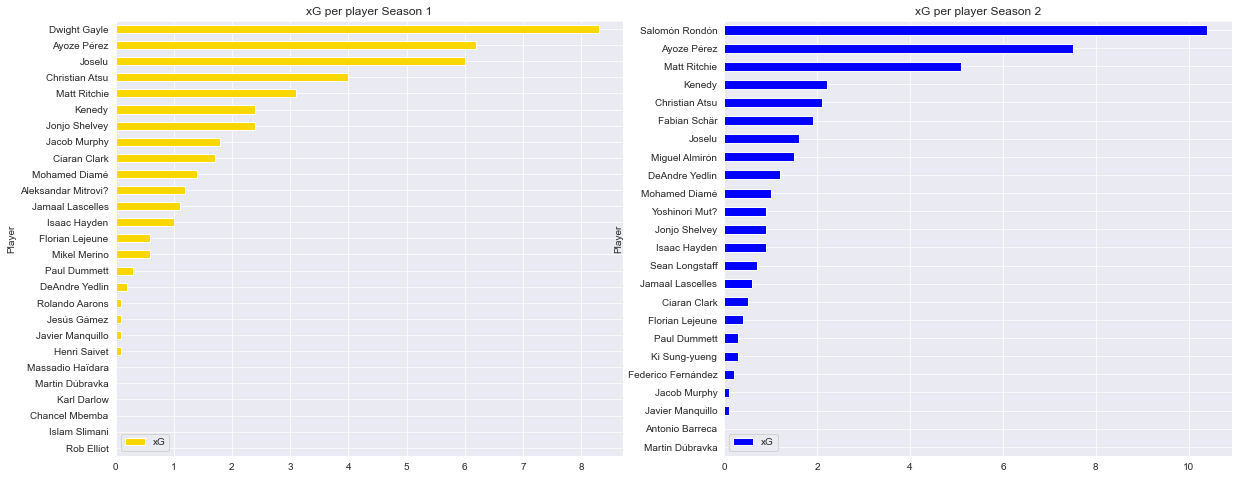

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('xG')
df_c2 = df2.sort_values('xG')
df_c1.plot.barh(x = 'Player', y = 'xG', ax = ax1, title = 'xG per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'xG', ax = ax2, title = 'xG per player Season 2',
             color='blue')
plt.show()

In [15]:
print("Team xG in " + team + " first season squad was: " + str(sum(df1['xG'])))
print("Team xG in " + team + " second season squad was: " + str(sum(df2['xG'])))

Team xG in Newcastle United first season squad was: 42.70000000000001
Team xG in Newcastle United second season squad was: 40.4


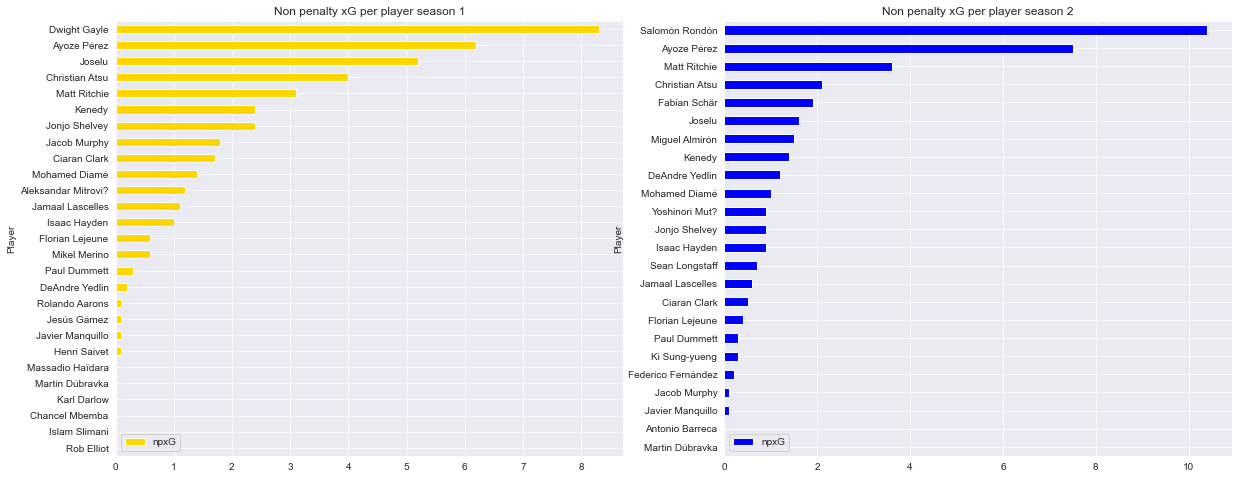

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('npxG')
df_c2 = df2.sort_values('npxG')
df_c1.plot.barh(x = 'Player', y = 'npxG', ax = ax1, title='Non penalty xG per player season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'npxG', ax = ax2, title='Non penalty xG per player season 2',
             color='blue')
plt.show()

In [17]:
print("Non penalty team xG in " + team + " first season squad was: " + str(sum(df1['npxG'])))
print("Non penalty team xG in " + team + " second season squad was: " + str(sum(df2['npxG'])))

Non penalty team xG in Newcastle United first season squad was: 41.900000000000006
Non penalty team xG in Newcastle United second season squad was: 38.1


#### xG VS Actual Difference

In [18]:
df1['Actual - xG'] = df1['Gls'] - df1['xG']
df2['Actual - xG'] = df2['Gls'] - df2['xG']

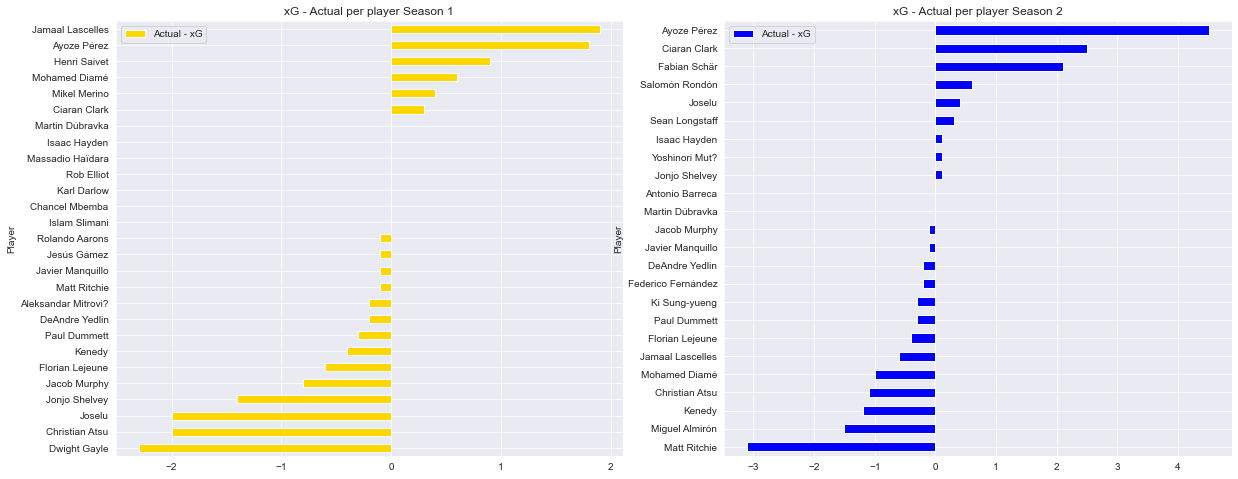

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('Actual - xG')
df_c2 = df2.sort_values('Actual - xG')
df_c1.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax1, title='xG - Actual per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax2, title='xG - Actual per player Season 2',
             color='blue')
plt.show()

### Let's now investigate Assists and expected assists (xA). This will allow us to see did Newcastle United create high quality chances and if this was potentially a factor in their drop off across the two seasons.

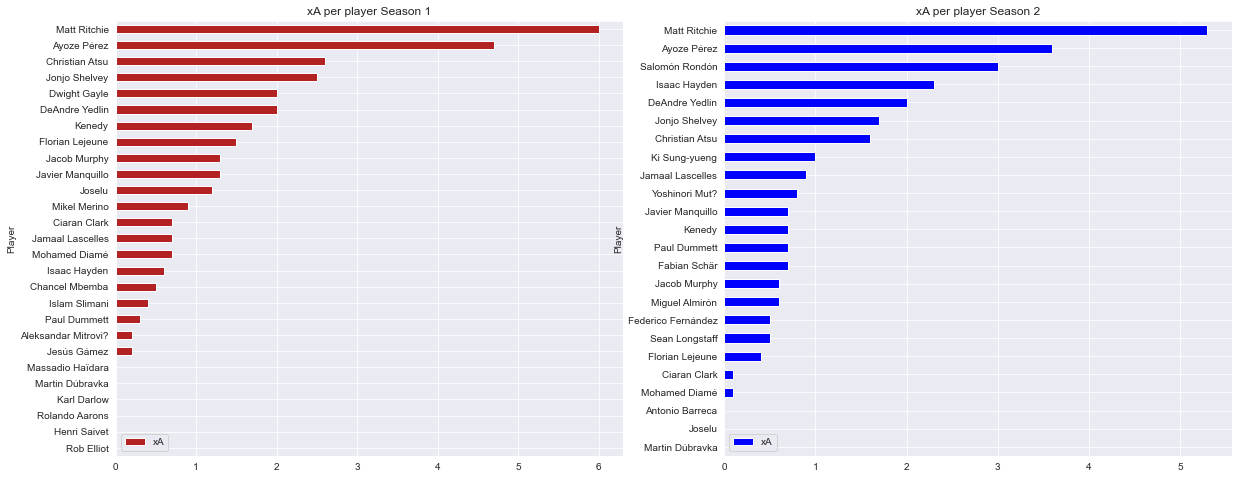

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('xA')
df_c2 = df2.sort_values('xA')
df_c1.plot.barh(x = 'Player', y = 'xA', ax = ax1, title = 'xA per player Season 1',
             color = 'firebrick')
df_c2.plot.barh(x = 'Player', y = 'xA', ax = ax2, title = 'xA per player Season 2',
             color = 'blue')
plt.show()

In [21]:
print("Team xA in " + team + " first season squad was: " + str(sum(df1['xA'])))
print("Team xA in " + team + " second season squad was: " + str(sum(df2['xA'])))

Team xA in Newcastle United first season squad was: 31.999999999999996
Team xA in Newcastle United second season squad was: 27.800000000000004


#### xA VS Actual Assists

In [22]:
df1['Actual - xA'] = df1['Ast'] - df1['xA']
df2['Actual - xA'] = df2['Ast'] - df2['xA']

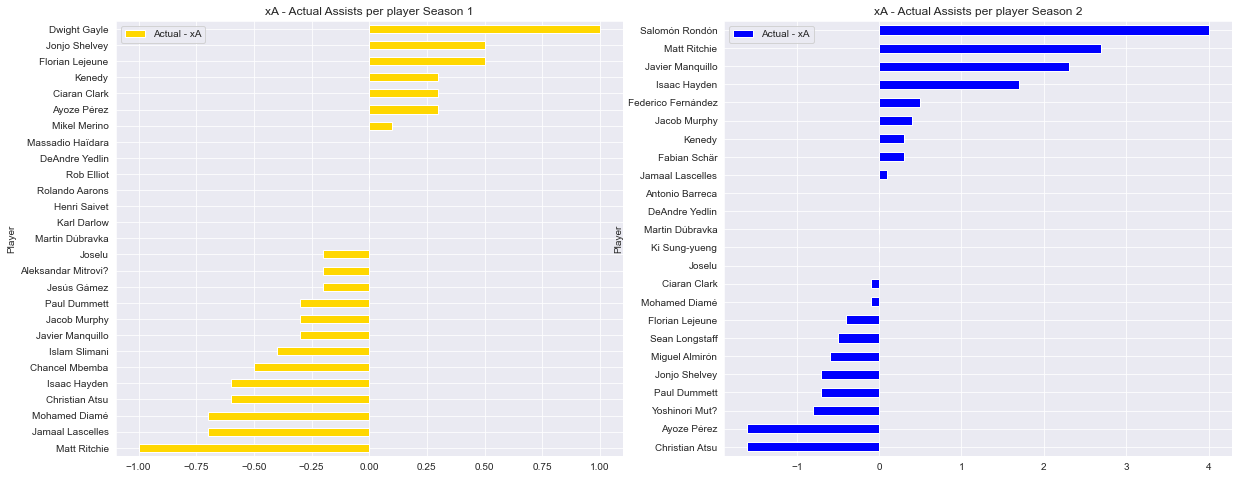

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Actual - xA')
df_c2 = df2.sort_values('Actual - xA')
df_c1.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax1, title='xA - Actual Assists per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax2, title='xA - Actual Assists per player Season 2',
             color='blue')
plt.show()

In [24]:
print("Team actual minus xA in " + team + " first season squad was: " + str(sum(df1['Actual - xA'])))
print("Team actual minus xA in " + team + " second season squad was: " + str(sum(df2['Actual - xA'])))

Team actual minus xA in Newcastle United first season squad was: -3.0000000000000004
Team actual minus xA in Newcastle United second season squad was: 5.200000000000001


### Per 90 comparisons

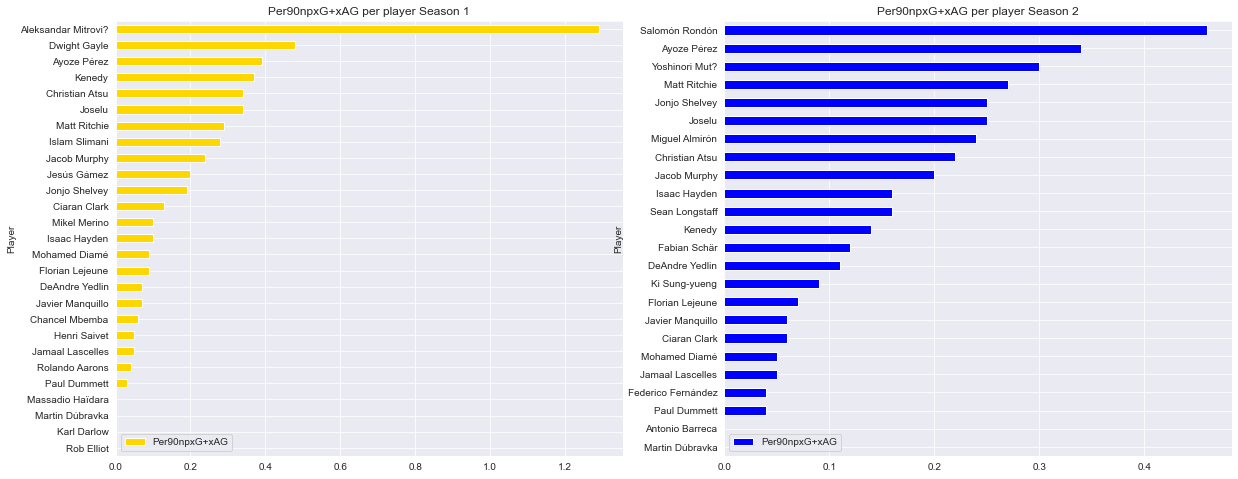

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Per90npxG+xAG')
df_c2 = df2.sort_values('Per90npxG+xAG')
df_c1.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax1, title='Per90npxG+xAG per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax2, title='Per90npxG+xAG per player Season 2',
             color='blue')
plt.show()

### Let's now compare players who played in both seasons for Newcastle
By doing this, it allows us to better understand if for example a significant turnover of players or a loss of form from previously key players led to their "second season syndrome". We will focus on minutes played and per 90 metrics here.

In [26]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Per90npxG+xAG"].item()
        # subtract 2021/22 data from 2020/21 for players who played both seasons
        ## if result of this subtraction is negative then the player performance has regressed
        vals = val - df1.loc[df1['Player'] == players1[i], "Per90npxG+xAG"].item()
        d[players1[i]] = vals
    else:
        continue

In [27]:
per90commonplayers = pd.DataFrame.from_dict(d, orient='index')

In [28]:
per90commonplayers = per90commonplayers.reset_index()
per90commonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceXGXA'}, inplace = True)

In [29]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d1 = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Min"].item()
        vals = val - df1.loc[df1['Player'] == players1[i], "Min"].item()
        d1[players1[i]] = vals
    else:
        continue

In [30]:
minscommonplayers = pd.DataFrame.from_dict(d1, orient = 'index')
minscommonplayers = minscommonplayers.reset_index()
minscommonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceMins'}, inplace = True)

In [31]:
result = pd.merge(minscommonplayers, per90commonplayers, on = ["Name"])

In [32]:
result.head()

,Name,SeasonDifferenceMins,SeasonDifferenceXGXA
0,Jamaal Lascelles,-183,0.00
1,Matt Ritchie,124,-0.02
2,DeAndre Yedlin,-372,0.04
3,Ayoze Pérez,425,-0.05
4,Jonjo Shelvey,-1322,0.06


<AxesSubplot:title={'center':'Per90XG+XA Difference for Newcastle United Players who played in both seasons'}, xlabel='Player Name', ylabel='Per90XG+XA'>

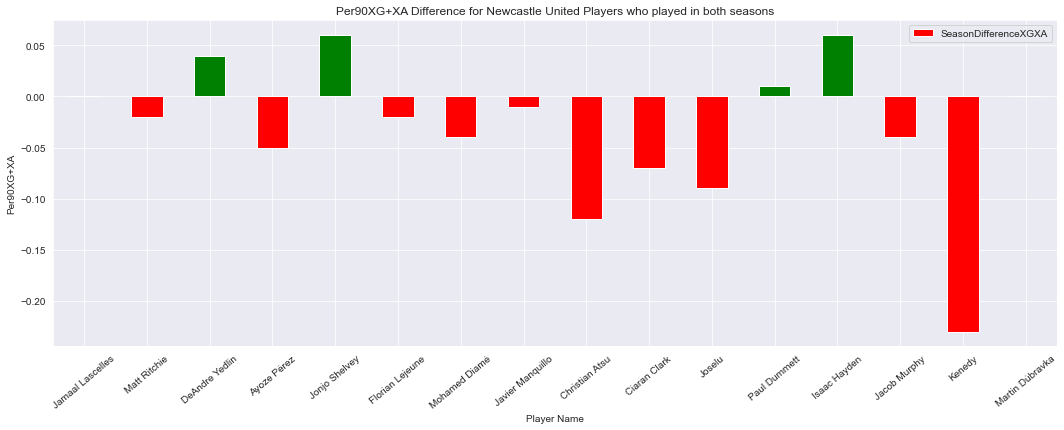

In [33]:
result.plot.bar(x = 'Name', y = 'SeasonDifferenceXGXA', rot = 40, figsize=(18, 6),
                title = 'Per90XG+XA Difference for ' + team + ' Players who played in both seasons',
                ylabel = 'Per90XG+XA', xlabel = 'Player Name',
                color=(result['SeasonDifferenceXGXA'] > 0).map({True: 'g', False: 'r'}))

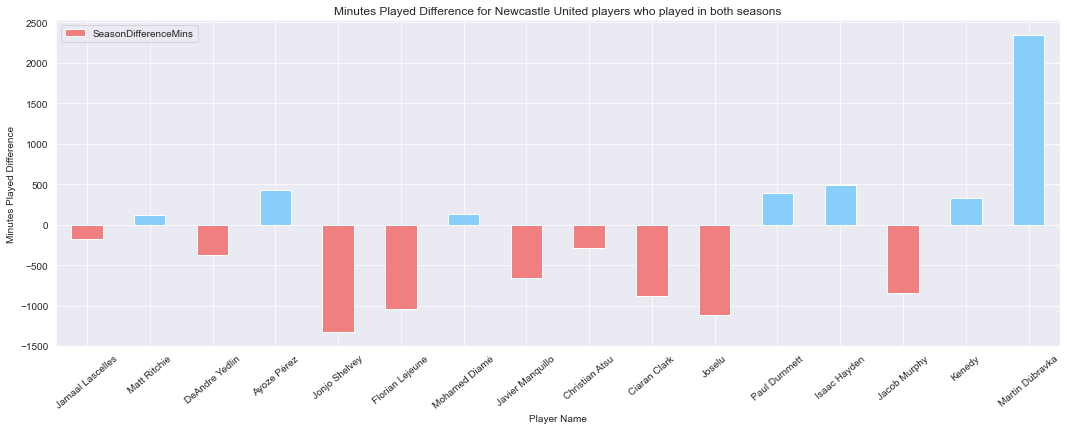

In [34]:
result.plot.bar(x = 'Name', y = "SeasonDifferenceMins", rot = 40, figsize = (18, 6),
                title = 'Minutes Played Difference for ' + team + ' players who played in both seasons',
                ylabel = 'Minutes Played Difference', xlabel = 'Player Name',
                color = (result['SeasonDifferenceMins'] > 0).map({True: 'lightskyblue', False: 'lightcoral'}))
fig.patch.set_facecolor('white')

### Goalkeeper Analysis

In [35]:
gkseason1 = pd.read_csv("datasets/cleanedAdvanced/newcastle-adkeeper1718-cleaned.csv")
gkseason2 = pd.read_csv("datasets/cleanedAdvanced/newcastle-adkeeper1819-cleaned.csv")

In [36]:
gkseason1.head()

,Player,Nation,Pos,Age,90s,GA,PKA,FK,CK,OG,...,PassesAvgLen,GoalKickAtt,GoalKickLaunch%,GoalKickAvgLen,CrossesOpp,CrossesStp,CrossesStp%,Sweep#OPA,Sweep#OPA/90,SweepAvgDist
0,Rob Elliot,ie IRL,GK,31.0,16.0,21,1,0,3,1,...,44.1,159,82.4,55.8,258,15,5.8,15,0.94,13.2
1,Martin DÃºbravka,sk SVK,GK,28.0,12.0,11,0,0,0,0,...,38.5,93,80.6,56.0,184,13,7.1,13,1.08,12.9
2,Karl Darlow,eng ENG,GK,26.0,10.0,15,3,0,0,2,...,43.2,87,89.7,57.9,159,11,6.9,4,0.40,11.7
3,Squad Total,NaN,NaN,25.6,38.0,47,4,0,3,3,...,42.2,339,83.8,56.4,601,39,6.5,32,0.84,12.7


In [37]:
gkseason1.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'GA', 'PKA', 'FK', 'CK', 'OG',
       'ExpectedPSxG', 'ExpectedPSxG/SoT', 'ExpectedPSxG+/-', 'Expected/90',
       'LaunchedCmp', 'LaunchedAtt', 'LaunchedCmp%', 'PassesAtt', 'PassesThr',
       'PassesLaunch%', 'PassesAvgLen', 'GoalKickAtt', 'GoalKickLaunch%',
       'GoalKickAvgLen', 'CrossesOpp', 'CrossesStp', 'CrossesStp%',
       'Sweep#OPA', 'Sweep#OPA/90', 'SweepAvgDist'],
      dtype='object')

In [38]:
def compare_seasons(dffirst, dfsecond, col1, col2, string1, string2):
    # leave out last line , as this has squad totals, this function is used for player comparison across two seasons
    leavelastline_firstseason = dffirst[:-1]
    leavelastline_secondseason = dfsecond[:-1]
    season1 = list(leavelastline_firstseason[col1])
    season2 = list(leavelastline_secondseason[col1])
    dict1 = {}
    dict2 = {}
    for i in range(len(season1)):
        if season1[i] in season2:
            dict1[season1[i]] = leavelastline_firstseason.loc[leavelastline_firstseason[col1] == season1[i], col2].item()
            dict2[season1[i]] = leavelastline_secondseason.loc[leavelastline_secondseason[col1] == season1[i], col2].item()
        else:
            continue

    firstseason = pd.DataFrame.from_dict(dict1, orient = 'index')
    firstseason = firstseason.reset_index()
    firstseason.rename(columns = {'index': 'Name', 0: string1}, inplace = True)
    secondseason = pd.DataFrame.from_dict(dict2, orient = 'index')
    secondseason = secondseason.reset_index()
    secondseason.rename(columns = {'index': 'Name', 0: string2}, inplace = True)
    resultdf = pd.merge(firstseason, secondseason, on = ["Name"])
    return resultdf

In [39]:
def compare_seasons_all(dffirst, dfsecond, col1, col2, string1, string2):
    leavelastline_firstseason = dffirst
    leavelastline_secondseason = dfsecond
    season1 = list(leavelastline_firstseason[col1])
    season2 = list(leavelastline_secondseason[col1])
    dict1 = {}
    dict2 = {}
    for i in range(len(season1)):
        if season1[i] in season2:
            dict1[season1[i]] = leavelastline_firstseason.loc[leavelastline_firstseason[col1] == season1[i], col2].item()
            dict2[season1[i]] = leavelastline_secondseason.loc[leavelastline_secondseason[col1] == season1[i], col2].item()
        else:
            continue

    firstseason = pd.DataFrame.from_dict(dict1, orient = 'index')
    firstseason = firstseason.reset_index()
    firstseason.rename(columns = {'index': 'Name', 0: string1}, inplace = True)
    secondseason = pd.DataFrame.from_dict(dict2, orient = 'index')
    secondseason = secondseason.reset_index()
    secondseason.rename(columns = {'index': 'Name', 0: string2}, inplace = True)
    resultdf = pd.merge(firstseason, secondseason, on = ["Name"])
    return resultdf

In [40]:
keepersmerged = compare_seasons_all(gkseason1, gkseason2, 'Player', 'ExpectedPSxG+/-', '17-18ExpectedPSxG+/-', '18-19ExpectedPSxG+/-')

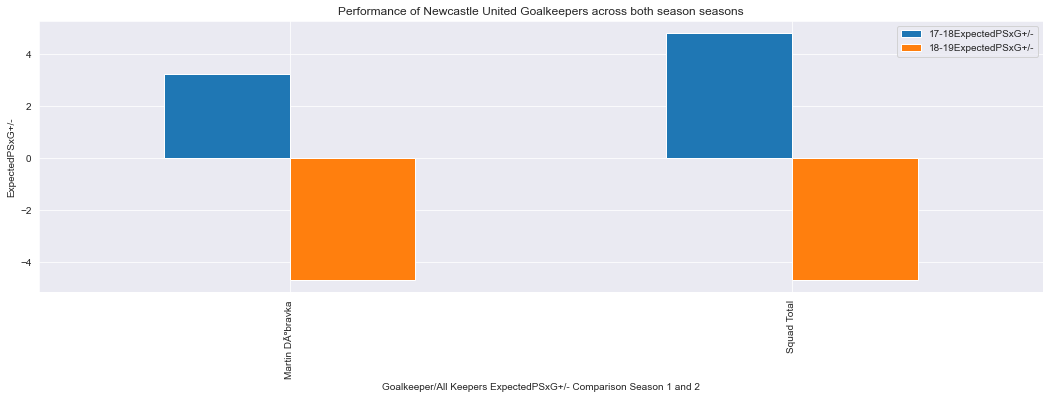

In [41]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged.set_index('Name').plot.bar()
data_chart.set_xlabel('Goalkeeper/All Keepers ExpectedPSxG+/- Comparison Season 1 and 2')
data_chart.set_ylabel('ExpectedPSxG+/-')
data_chart.set_title('Performance of ' + team + ' Goalkeepers across both season seasons')
plt.show()

In [42]:
keepersmerged1 = compare_seasons_all(gkseason1, gkseason2, 'Player', 'PassesLaunch%', '17-18PassesLaunch', '18-19PassesLaunch')

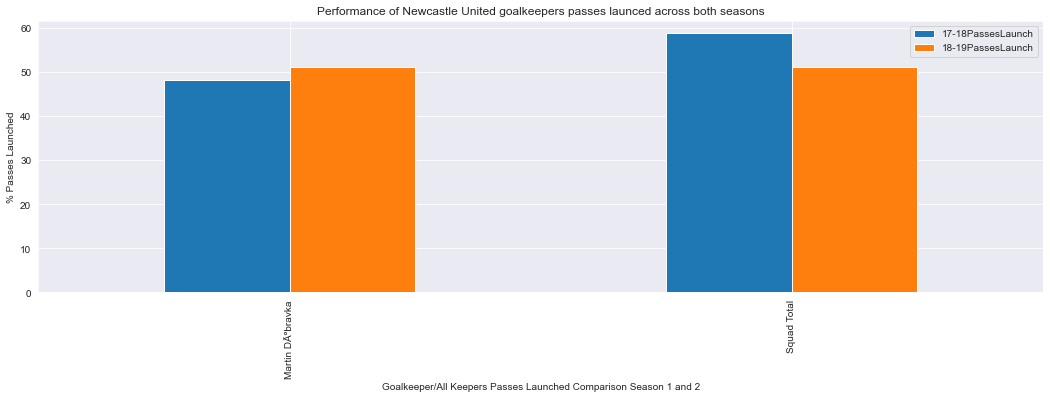

In [43]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged1.set_index('Name').plot.bar()
data_chart.set_xlabel('Goalkeeper/All Keepers Passes Launched Comparison Season 1 and 2')
data_chart.set_ylabel('% Passes Launched')
data_chart.set_title('Performance of ' + team + ' goalkeepers passes launced across both seasons')
plt.show()

### Defensive Actions

In [44]:
defensivefirstseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-defensive1718-cleaned.csv")
defensivesecondseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-defensive1819-cleaned.csv")

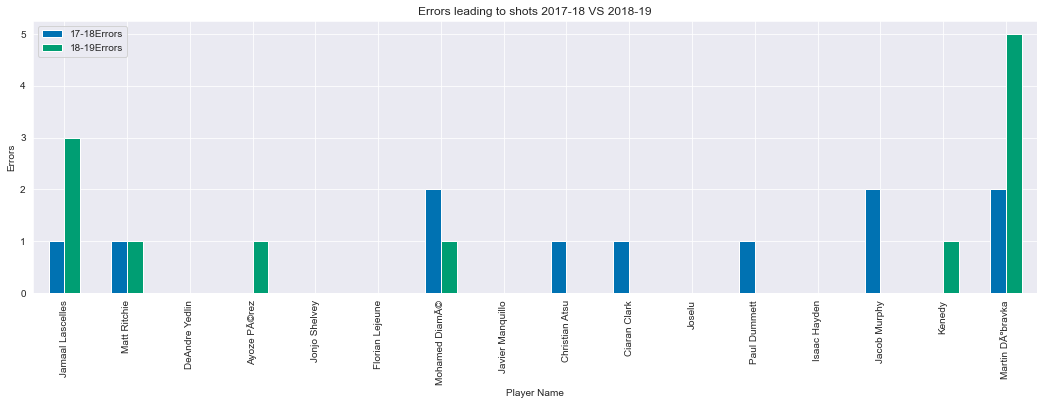

In [45]:
errorsdf = compare_seasons(defensivefirstseason, defensivesecondseason, 'Player', 'Errors', '17-18Errors', '18-19Errors')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = errorsdf.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Errors')
data_chart.set_title('Errors leading to shots ' + s1 + " VS " + s2)
plt.show()

### Discipline

In [46]:
discipline_firstseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-miscell1718-cleaned.csv")
discipline_secondseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-miscell1819-cleaned.csv")

In [47]:
discipline_firstseason.tail(2)

,Player,Nation,Pos,Age,90s,CrdY,CrdR,2CrdY,Fls,Fld,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,AerialDuelWon,AerielDuelLost,AerialDuelWon%
26,Massadio HaÃ¯dara,ml MLI,FW,24.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
27,Squad Total,NaN,NaN,25.6,38.0,NaN,NaN,1,409,369,...,616,441,426,1,6,3,2021,884,927,48.8


In [48]:
discipline_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CrdY', 'CrdR', '2CrdY', 'Fls',
       'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov',
       'AerialDuelWon', 'AerielDuelLost', 'AerialDuelWon%'],
      dtype='object')

In [49]:
discipline_firstseason_cards1 = discipline_firstseason[-1:]

In [50]:
discipline_secondseason_cards2 = discipline_secondseason[-1:]

In [51]:
discipline_firstseason_cards = discipline_firstseason_cards1[['Player', 'CrdY', 'CrdR']]
discipline_secondseason_cards = discipline_secondseason_cards2[['Player', 'CrdY', 'CrdR']]

In [52]:
discipline_firstseason_cards = discipline_firstseason_cards.replace("Squad Total", "Season 1 Total")
discipline_secondseason_cards = discipline_secondseason_cards.replace("Squad Total", "Season 2 Total")

In [53]:
overall_discipline = pd.concat([discipline_firstseason_cards, discipline_secondseason_cards])

In [97]:
overall_discipline

,Player,CrdY,CrdR
27,Season 1 Total,NaN,NaN
24,Season 2 Total,57.0,2.0


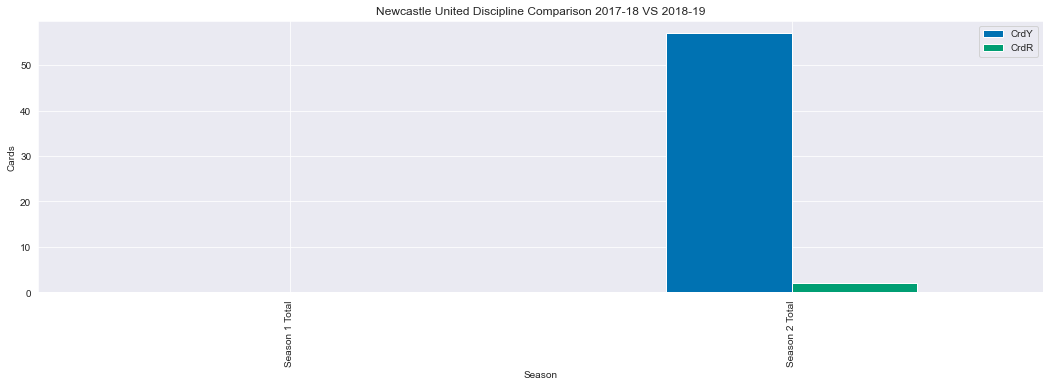

In [54]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_discipline.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Cards')
data_chart.set_title(team + ' Discipline Comparison ' + s1 +  " VS " + s2)
plt.show()

In [55]:
# aerial duels comparison
discipline_firstseason_duels = discipline_firstseason_cards1[['Player', 'AerialDuelWon%']]
discipline_secondseason_duels = discipline_secondseason_cards2[['Player', 'AerialDuelWon%']]

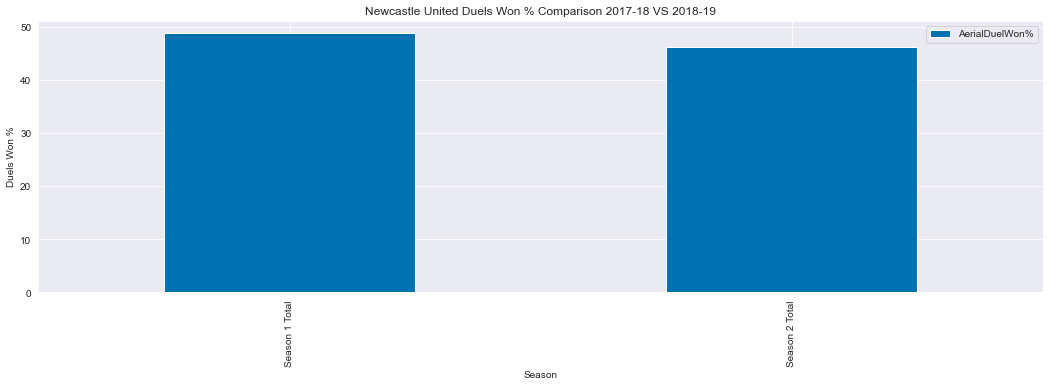

In [56]:
discipline_firstseason_duels = discipline_firstseason_duels.replace("Squad Total", "Season 1 Total")
discipline_secondseason_duels = discipline_secondseason_duels.replace("Squad Total", "Season 2 Total")
overall_duels = pd.concat([discipline_firstseason_duels, discipline_secondseason_duels])
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_duels.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Duels Won %')
data_chart.set_title(team + ' Duels Won % Comparison ' + s1 + " VS " + s2)
plt.show()

### XG Comparison - For/Against

In [57]:
for_against_first = dftotals1.iloc[-2:]
for_against_second = dftotals2.iloc[-2:]

In [58]:
dftotals1.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
24,Henri Saivet,sn SEN,MF,26.0,1,1,83,0.9,1,0,...,1.08,0.1,0.1,0.0,0.1,0.05,0.00,0.05,0.05,0.05
25,Aleksandar Mitrovi?,rs SRB,FW,22.0,6,0,95,1.1,1,0,...,0.95,1.2,1.2,0.2,1.3,1.14,0.15,1.29,1.14,1.29
26,Massadio Haïdara,ml MLI,FW,24.0,1,0,4,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
27,Squad Total,NaN,NaN,25.6,38,418,3420,38.0,38,29,...,1.76,41.6,40.9,32.1,72.9,1.10,0.84,1.94,1.08,1.92
28,Opponent Total,NaN,NaN,26.9,38,418,3420,38.0,44,32,...,1.89,52.4,47.6,37.4,85.1,1.38,0.99,2.37,1.25,2.24


In [59]:
dftotals2.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
21,Yoshinori Mut?,jp JPN,FWMF,26.0,17,5,524,5.8,1,0,...,0.17,0.9,0.9,0.8,1.7,0.16,0.14,0.30,0.16,0.30
22,Jacob Murphy,eng ENG,MFDF,23.0,9,3,302,3.4,0,1,...,0.30,0.1,0.1,0.6,0.7,0.02,0.18,0.20,0.02,0.20
23,Antonio Barreca,it ITA,DF,23.0,1,0,5,0.1,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
24,Squad Total,NaN,NaN,26.9,38,418,3420,38.0,41,33,...,1.92,39.1,36.7,27.4,64.1,1.03,0.72,1.75,0.97,1.69
25,Opponent Total,NaN,NaN,26.8,38,418,3420,38.0,47,32,...,1.92,53.6,49.2,39.5,88.7,1.41,1.04,2.45,1.29,2.33


In [60]:
comp1 = for_against_first[['Player', 'Gls', 'xG']]
comp2 = for_against_second[['Player', 'Gls', 'xG']]

In [61]:
comp1.replace({'Squad Total': 'SquadTotalSeason1', 'Opponent Total': 'OpponentTotalSeason1'}, inplace = True)
comp2.replace({'Squad Total': 'SquadTotalSeason2', 'Opponent Total': 'OpponentTotalSeason2'}, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [62]:
overall_xg = pd.concat([comp1, comp2])
overall_xg

,Player,Gls,xG
27,SquadTotalSeason1,38,41.6
28,OpponentTotalSeason1,44,52.4
24,SquadTotalSeason2,41,39.1
25,OpponentTotalSeason2,47,53.6


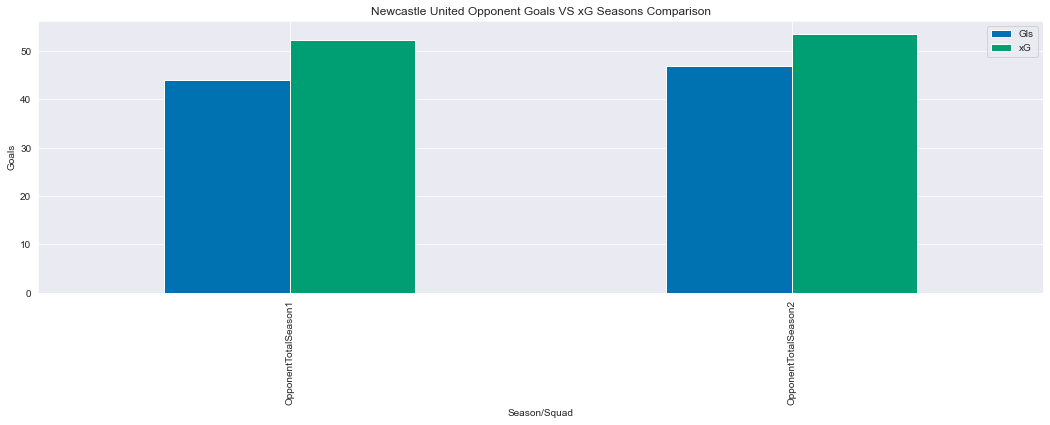

In [63]:
overall_xg_opp = overall_xg.loc[overall_xg['Player'].str.contains('Opponent')]
overall_xg_opp = overall_xg_opp.sort_values('Player')
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_xg_opp.set_index('Player').plot.bar()
data_chart.set_xlabel('Season/Squad')
data_chart.set_ylabel('Goals')
data_chart.set_title(team + ' Opponent Goals VS xG Seasons Comparison')
plt.show()

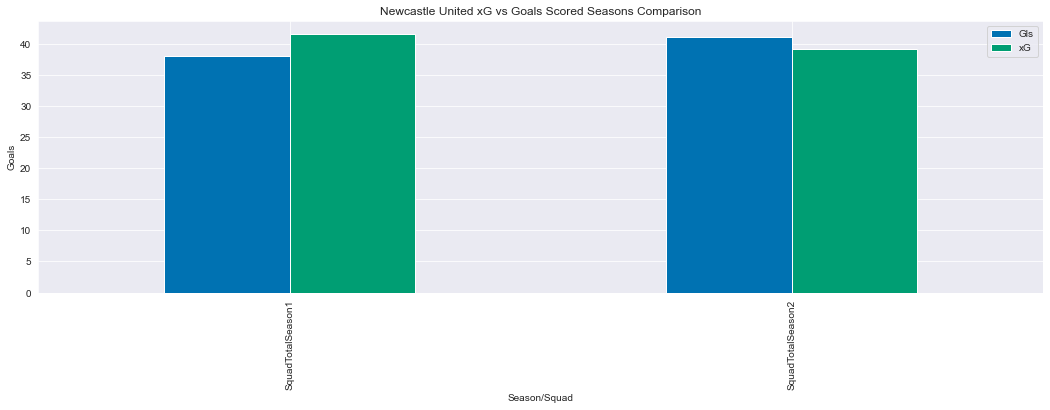

In [64]:
overall_xg_lee = overall_xg.loc[overall_xg['Player'].str.contains('SquadTotalSeason')]
overall_xg_lee = overall_xg_lee.sort_values('Player')
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_xg_lee.set_index('Player').plot.bar()
data_chart.set_xlabel('Season/Squad')
data_chart.set_ylabel('Goals')
data_chart.set_title(team + ' xG vs Goals Scored Seasons Comparison')
plt.show()

### Goal and Shot Creation

In [65]:
shotcreate_firstseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-shootcreate1718-cleaned.csv")
shotcreate_secondseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-shootcreate1819-cleaned.csv")

In [66]:
shotcreate_firstseason.head()

,Player,Nation,Pos,Age,90s,SCA,SCA90,PassLive,PassDead,Drib,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,Jamaal Lascelles,eng ENG,DF,23.0,32.5,17,0.52,15,1,0,...,0,0,0,0.00,0,0,0,0,0,0
1,Matt Ritchie,sct SCO,MFFW,27.0,31.2,107,3.43,63,25,5,...,6,1,8,0.26,3,4,0,1,0,0
2,DeAndre Yedlin,us USA,DF,24.0,31.6,55,1.74,48,4,1,...,1,0,2,0.06,2,0,0,0,0,0
3,Ayoze PÃ©rez,es ESP,MFFW,24.0,27.7,85,3.07,61,0,3,...,9,4,10,0.36,7,0,0,3,0,0
4,Jonjo Shelvey,eng ENG,MF,25.0,25.2,82,3.25,57,18,3,...,0,1,7,0.28,4,2,0,1,0,0


In [67]:
shotcreate_firstseason1 = shotcreate_firstseason[['Player', 'Pos', 'SCA', 'SCA90', 'GCA', 'GCA90']]
shotcreate_secondseason2 = shotcreate_secondseason[['Player', 'Pos', 'SCA', 'SCA90', 'GCA', 'GCA90']]

In [68]:
shotcreate_firstseason1 = shotcreate_firstseason1[:-1]
shotcreate_secondseason2 = shotcreate_secondseason2[:-1]

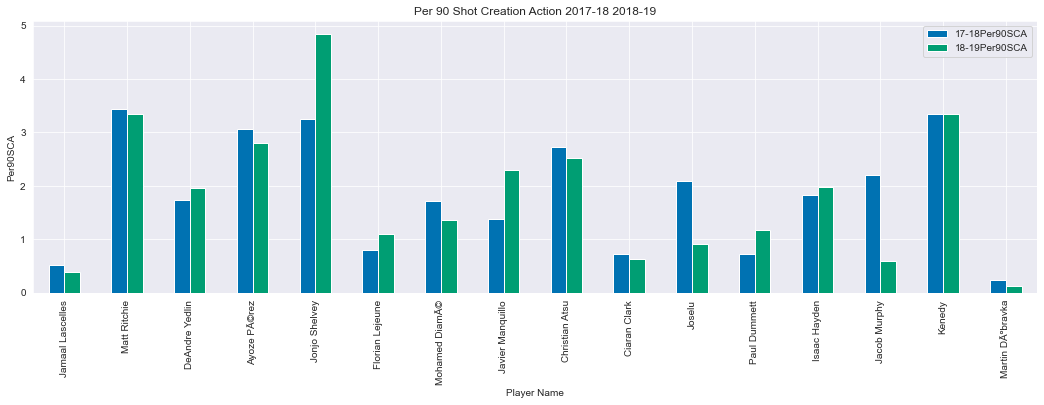

In [69]:
resultsca = compare_seasons(shotcreate_firstseason1, shotcreate_secondseason2, 'Player', 'SCA90', '17-18Per90SCA', '18-19Per90SCA')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = resultsca.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90SCA')
data_chart.set_title('Per 90 Shot Creation Action ' + s1 + " " + s2)
plt.show()

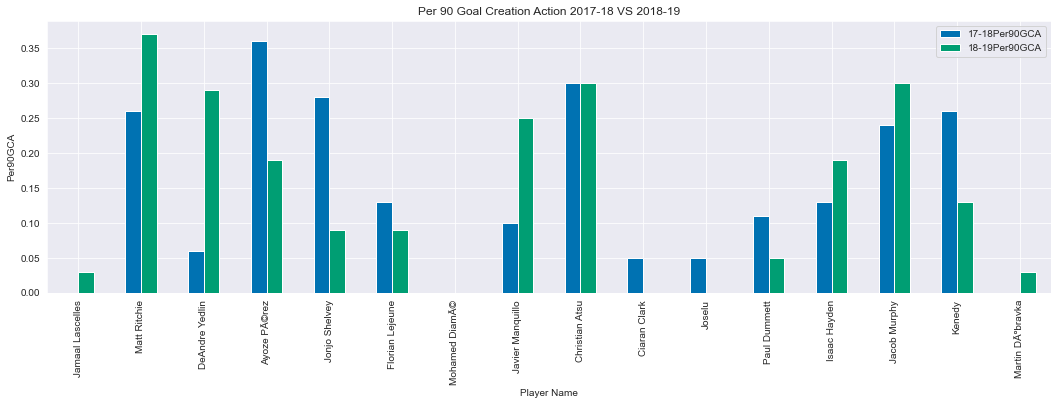

In [70]:
resultgca = compare_seasons(shotcreate_firstseason1, shotcreate_secondseason2, 'Player', 'GCA90', '17-18Per90GCA', '18-19Per90GCA')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = resultgca.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90GCA')
data_chart.set_title('Per 90 Goal Creation Action ' + s1 + " VS " + s2)
plt.show()

In [71]:
defensivefirstseason.head(1)

,Player,Nation,Pos,Age,90s,Tkl,TklWon,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,...,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,Blocks,ShotBlock,PassBlock,Interceptions,Tkl+Int,Clearances,Errors
0,Jamaal Lascelles,eng ENG,DF,23.0,32.5,31,19,19,11,1,...,19,63.2,7,33,24,9,28,59,232,1


In [72]:
lst_results = []
def create_90_val(df, col1, col2, lst):
    nineties = list(df[col1])
    metric = list(df[col2])
    for i in range(len(nineties)):
        if nineties[i] > 0:
            val_per_90 = metric[i] / nineties[i]
            lst.append(val_per_90)
        else:
            lst.append(0)
    return lst

In [73]:
val_s1 = create_90_val(defensivefirstseason, '90s', 'Interceptions', lst_results)
defensivefirstseason['InterceptionsPer90'] = val_s1

In [74]:
lst_res2 = []
val_s2 = create_90_val(defensivesecondseason, '90s', 'Interceptions', lst_res2)
defensivesecondseason['InterceptionsPer90'] = val_s2

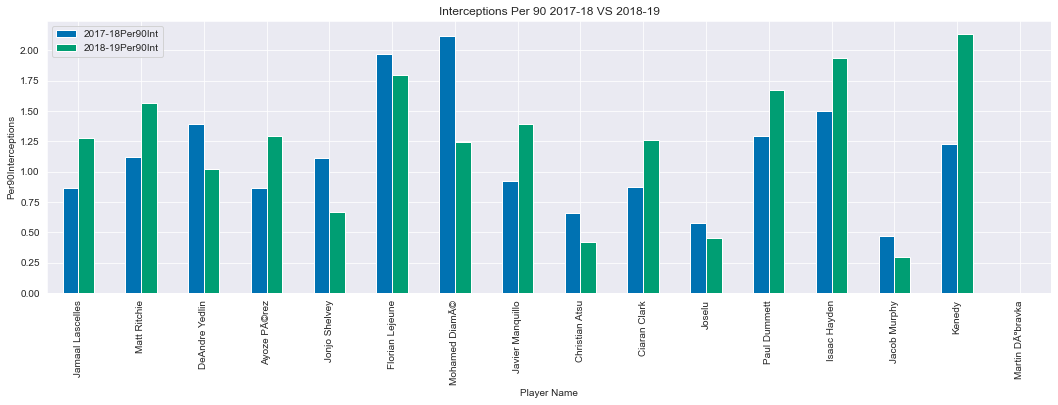

In [76]:
interceptions_per_90_comp = compare_seasons(defensivefirstseason, defensivesecondseason, 'Player', 'InterceptionsPer90', s1 + 'Per90Int', s2 + 'Per90Int')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = interceptions_per_90_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90Interceptions')
data_chart.set_title('Interceptions Per 90 ' + s1 + " VS " + s2)
plt.show()

### xG Per Shot

In [77]:
shot_firstseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-shoot1718-cleaned.csv")
shot_secondseason = pd.read_csv("datasets/cleanedAdvanced/newcastle-shoot1819-cleaned.csv")

In [78]:
shot_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')

In [79]:
## shots total does not include penalties

In [80]:
lst_res3 = []
shotfirst = create_90_val(shot_firstseason, 'Sh', 'xG', lst_res3)
shot_firstseason['xGPerShot'] = shotfirst

In [81]:
shot_firstseason.head(1)

,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,xGPerShot
0,Jamaal Lascelles,eng ENG,DF,23.0,32.5,3,12,8,66.7,0.37,...,12.2,0,0,0,1.1,1.1,0.09,1.9,1.9,0.091667


In [82]:
lst_res4 = []
shotsecond = create_90_val(shot_secondseason, 'Sh', 'xG', lst_res4)
shot_secondseason['xGPerShot'] = shotsecond

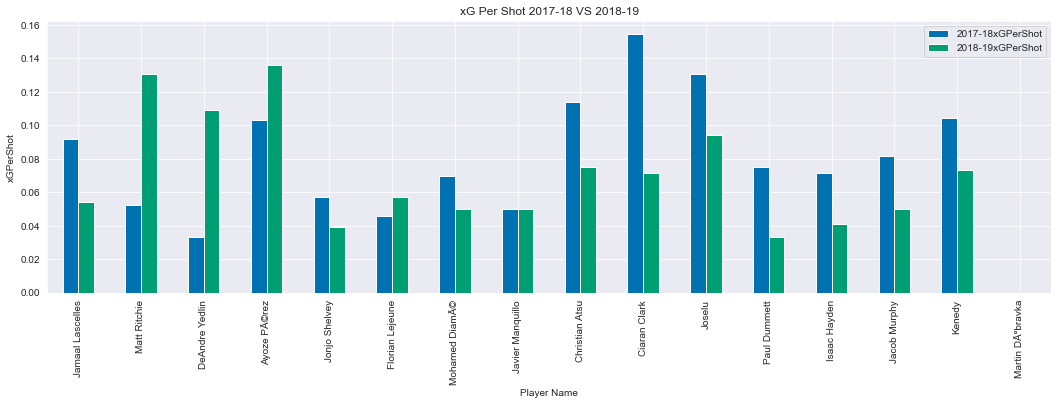

In [83]:
xg_per_shot_comp = compare_seasons(shot_firstseason, shot_secondseason, 'Player', 'xGPerShot', s1 + 'xGPerShot', s2 + 'xGPerShot')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = xg_per_shot_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('xGPerShot')
data_chart.set_title('xG Per Shot ' + s1 + " VS " + s2)
plt.show()

### Passing Breakdown

In [84]:
pass_firstseason = pd.read_csv('datasets/cleanedAdvanced/newcastle-pass1718-cleaned.csv')
pass_secondseason = pd.read_csv('datasets/cleanedAdvanced/newcastle-pass1819-cleaned.csv')

In [85]:
pass_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CmpTotal', 'AttemptedTotal',
       'Cmp%Total', 'TotDist', 'ProgressiveDist', 'ShortCmp', 'ShortAttempted',
       'ShortCmp%', 'MediumCmp', 'MediumAttempt', 'MediumCmp%', 'LongCmp',
       'LongAttempted', 'LongCmp%', 'Assists', 'xAG', 'xA', 'A-xAG',
       'KeyPasses', 'CompletedFinalThird', 'PassesPenaltyArea', 'CrossesPA',
       'ProgressivePasses'],
      dtype='object')

In [86]:
pass_firstseason.head(1)

,Player,Nation,Pos,Age,90s,CmpTotal,AttemptedTotal,Cmp%Total,TotDist,ProgressiveDist,...,LongCmp%,Assists,xAG,xA,A-xAG,KeyPasses,CompletedFinalThird,PassesPenaltyArea,CrossesPA,ProgressivePasses
0,Jamaal Lascelles,eng ENG,DF,23.0,32.5,918,1195,76.8,17019,7376,...,49.0,0,0.7,0.8,-0.7,6,59,4,0,59


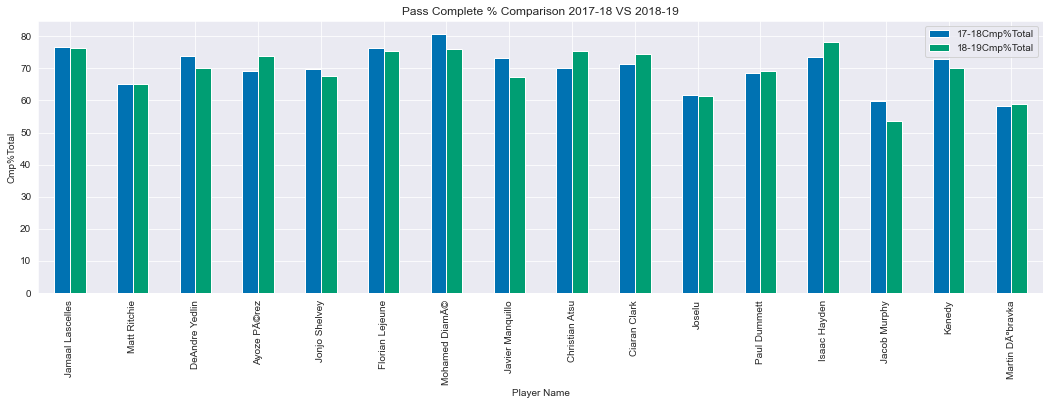

In [87]:
pass_cmp_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'Cmp%Total', '17-18Cmp%Total', '18-19Cmp%Total')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = pass_cmp_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Cmp%Total')
data_chart.set_title('Pass Complete % Comparison ' + s1 + " VS " + s2)
plt.show()

In [88]:
### add more comments later for above.
#### lets investigate how many more long balls were attempted as a % of attempted passes -> potential loss of control if higher
#### average progressive distance of passes too

In [89]:
lst_res5 = []
progpassfirst = create_90_val(pass_firstseason, 'CmpTotal', 'ProgressiveDist', lst_res5)
pass_firstseason['AvgProgressiveDist'] = progpassfirst

In [90]:
lst_res6 = []
progpasssecond = create_90_val(pass_secondseason, 'CmpTotal', 'ProgressiveDist', lst_res6)
pass_secondseason['AvgProgressiveDist'] = progpasssecond

In [91]:
pass_secondseason.head(1)

,Player,Nation,Pos,Age,90s,CmpTotal,AttemptedTotal,Cmp%Total,TotDist,ProgressiveDist,...,Assists,xAG,xA,A-xAG,KeyPasses,CompletedFinalThird,PassesPenaltyArea,CrossesPA,ProgressivePasses,AvgProgressiveDist
0,Martin DÃºbravka,sk SVK,GK,29.0,38.0,691,1175,58.8,24354,18974,...,0,0.0,0.1,0.0,0,12,0,0,0,27.458755


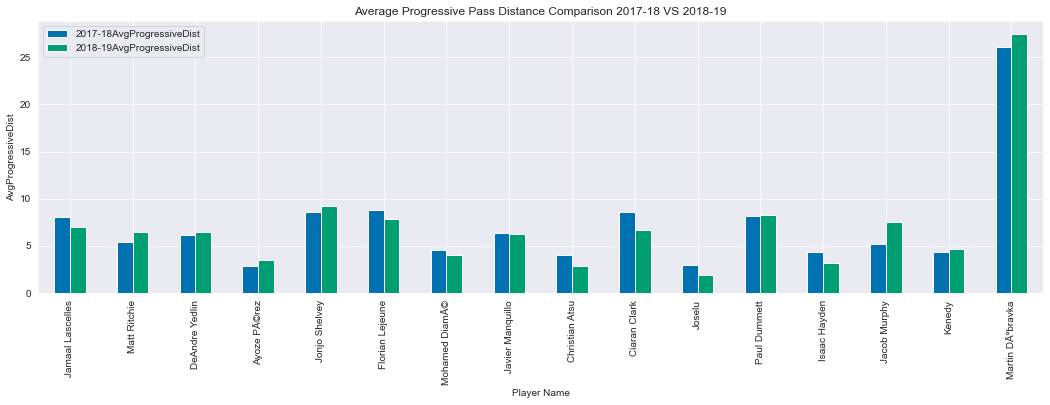

In [92]:
## compare average progression per pass completed over two season
avg_passdist_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'AvgProgressiveDist', s1 + 'AvgProgressiveDist', s2 + 'AvgProgressiveDist')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = avg_passdist_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('AvgProgressiveDist')
data_chart.set_title('Average Progressive Pass Distance Comparison ' + s1 + " VS " + s2)
plt.show()

In [93]:
### now for percentage long balls

In [94]:
lst_res8 = []
longpassfirst = create_90_val(pass_firstseason, 'AttemptedTotal', 'LongAttempted', lst_res8)
pass_firstseason['PercentageLongAtt'] = longpassfirst

In [95]:
lst_res9 = []
longpasssecond = create_90_val(pass_secondseason, 'AttemptedTotal', 'LongAttempted', lst_res9)
pass_secondseason['PercentageLongAtt'] = longpasssecond

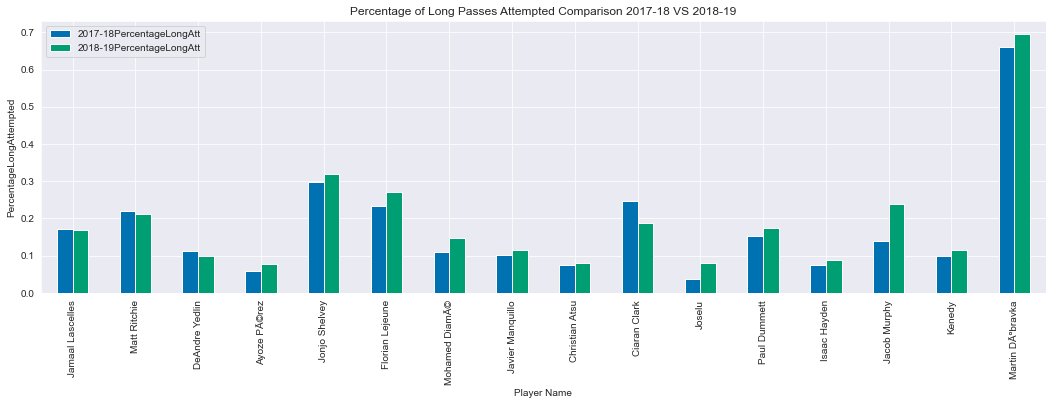

In [96]:
## compare attempted long passes as proportion of total attempted passes over two season
longpass_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'PercentageLongAtt', s1 + 'PercentageLongAtt', s2 + 'PercentageLongAtt')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = longpass_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('PercentageLongAttempted')
data_chart.set_title('Percentage of Long Passes Attempted Comparison ' + s1 + " VS " + s2)
plt.show()